# Exercises week 6

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 06.01. - Data Preparation

In [4]:

df_original = pd.read_csv("/Users/johannes/Library/CloudStorage/OneDrive-Personal/12_UNIVERSITY/2_ITU/30_SEMESTER_3/32_DataMining/3_CODING/damin2025/lecture06/exercises/original_penguins.csv")
df_knn = pd.read_csv("/Users/johannes/Library/CloudStorage/OneDrive-Personal/12_UNIVERSITY/2_ITU/30_SEMESTER_3/32_DataMining/3_CODING/damin2025/lecture06/exercises/penguins_knn.csv")
df_noChinstraps = pd.read_csv("/Users/johannes/Library/CloudStorage/OneDrive-Personal/12_UNIVERSITY/2_ITU/30_SEMESTER_3/32_DataMining/3_CODING/damin2025/lecture06/exercises/penguins_no_chinstraps.csv")


## exploration

In [41]:
def explore_dataset(df):
    print("Shape:", df.shape)
    print(df.info())
    print(df.head(10))

In [42]:
explore_dataset(df_original)

Shape: (344, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen

In [43]:
explore_dataset(df_knn)

Shape: (344, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            242 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0     NaN  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen

In [44]:
explore_dataset(df_noChinstraps)

Shape: (276, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            276 non-null    object 
 1   island             276 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   sex                265 non-null    object 
dtypes: float64(4), object(3)
memory usage: 15.2+ KB
None
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen

## Pairplot

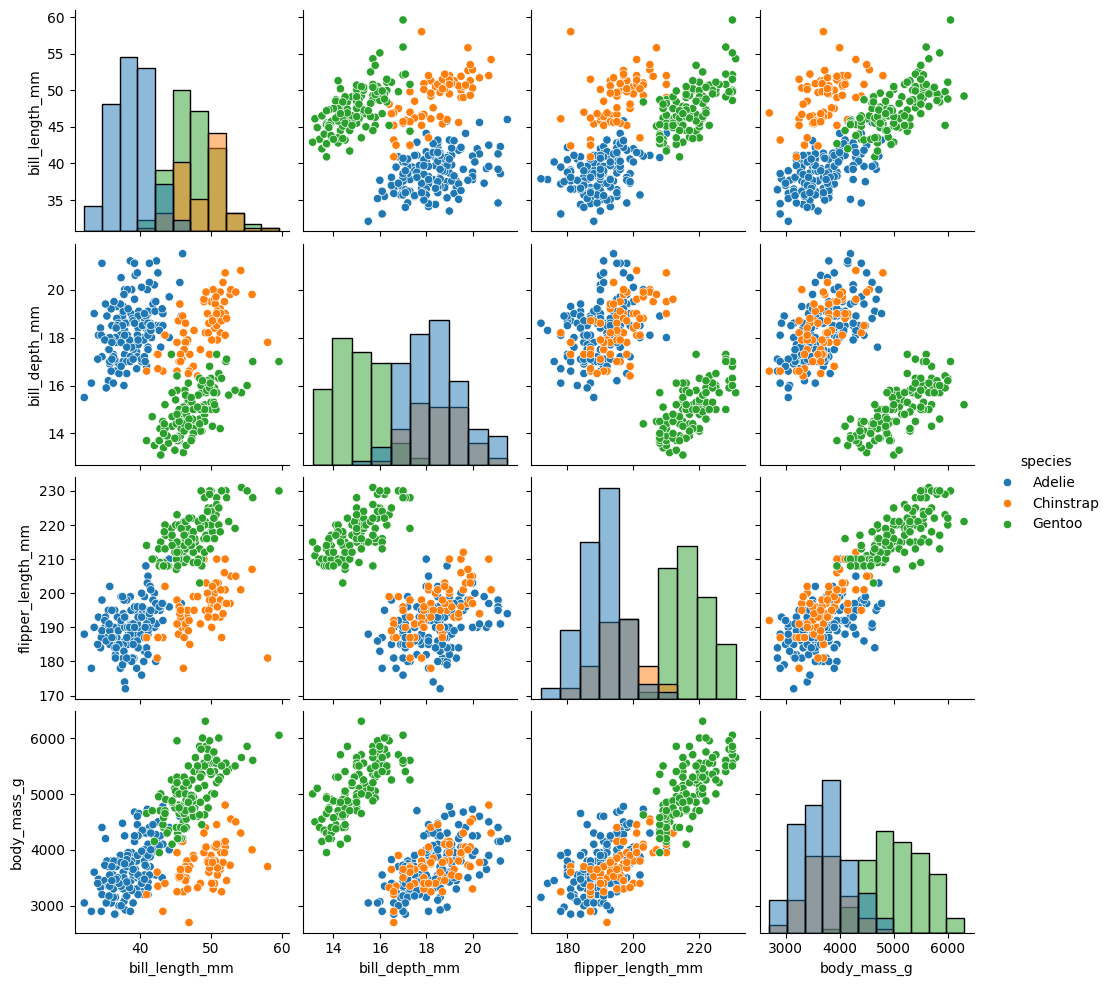

In [69]:
# Create the pairplot
sns.pairplot(df_original, diag_kind="hist", corner=False, hue='species')
plt.show()

## distribution of features in the 3 different files

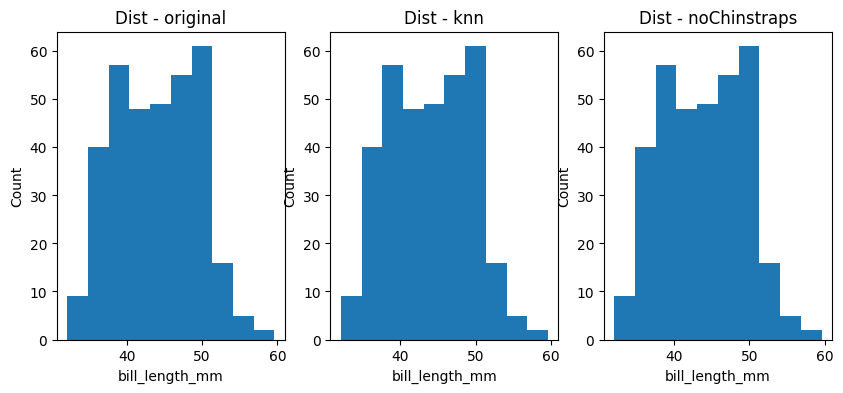

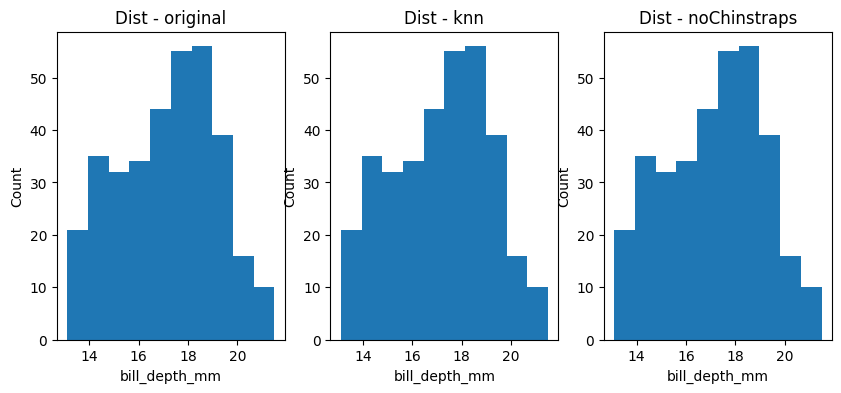

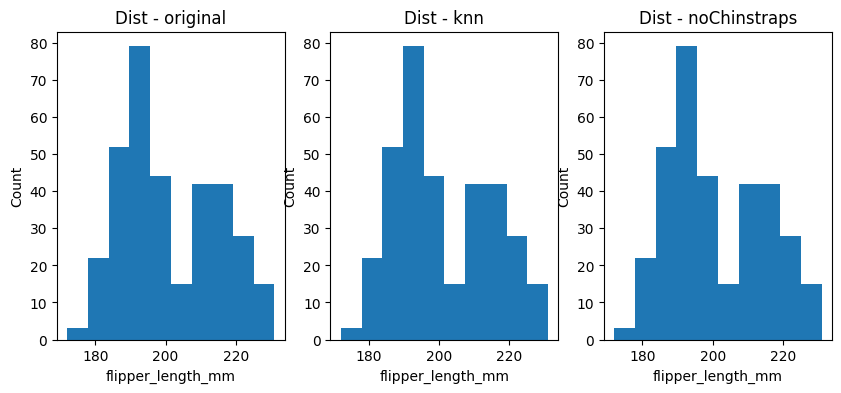

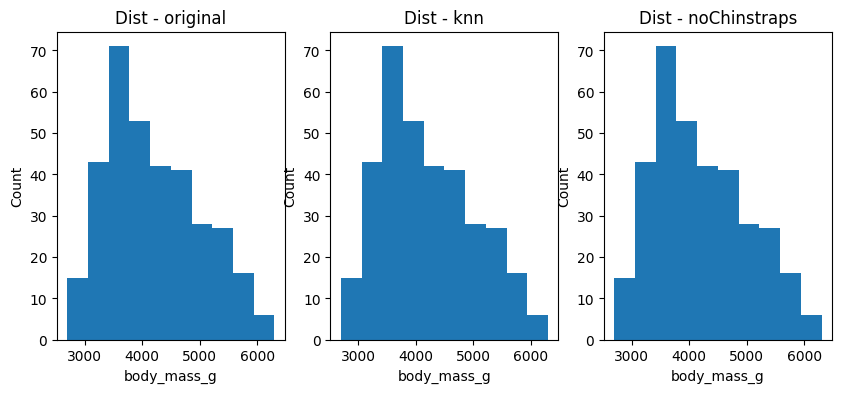

In [46]:

titles = ["original", "knn", "noChinstraps"]
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

for feature in  features:
    fig, axes = plt.subplots(
        nrows=1,
        ncols=3,
        figsize=(10,4)
    )
    for ax, title in zip(axes, titles):
        ax.set_title(f"Dist - {title}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Count")
        ax.hist(df_original[feature])


# 06.02. - The Closest Neighbors Are the Trustful Ones!

In [53]:
df_knn_pred = df_knn.copy()

### fill NaNs in BILL LENGTH - optionally drop rows without much info

In [54]:
cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
print(df_knn[cols].isnull().sum(axis=1) <= 1)
# df_knn_pred = df_knn[df_knn_pred[cols].isnull().sum(axis=1) <= 1] # drop rows without much info

0       True
1       True
2       True
3      False
4       True
       ...  
339    False
340     True
341     True
342     True
343     True
Length: 344, dtype: bool


### fill NaNs in BILL LENGTH

In [56]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2)

df_knn_pred["bill_length_mm"] = knn_imputer.fit_transform(
    df_knn_pred[["bill_length_mm"]]
)

print(df_knn_pred.shape)
df_knn_pred.head(10)

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,NaN,Torgersen,39.10000,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.50000,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.30000,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,43.92193,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.70000,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.30000,20.6,190.0,3650.0,Male
6,NaN,Torgersen,38.90000,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.20000,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.10000,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.00000,20.2,190.0,4250.0,NaN


In [57]:
print('No of NaNs in bill length col:', df_knn_pred['bill_length_mm'].isna().sum())

No of NaNs in bill length col: 0


### classify the missing SPECIES based on BILL LENGTH (mm):

In [58]:
import numpy as np
# from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

### Training

In [59]:
# filter rows with missing labels
df_knn_valid = df_knn_pred.dropna(subset=["species"])

# Split the dataset into training and testing sets. using only valid rows
# X = df_knn.drop("species", axis=1)
X = df_knn_valid[["bill_length_mm"]]
y = df_knn_valid["species"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create and train the k-NN classifier.
k = 7  # Number of neighbors.
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### predicting missing species

In [60]:
# Identify rows with missing species
missing_mask = df_knn_pred["species"].isna()

# Extract the feature(s) used for prediction
X_missing = df_knn_pred.loc[missing_mask, ["bill_length_mm"]]

# Predict species for those rows
predicted_species = knn.predict(X_missing)

# Fill in the missing values
df_knn_pred.loc[missing_mask, "species"] = predicted_species


In [61]:
print("% of missing species values:")
missing_mask.sum()/missing_mask.size

% of missing species values:


0.29651162790697677

In [63]:
correct_labels = (df_knn_pred.loc[missing_mask, "species"] == df_original.loc[missing_mask, "species"]).sum()
total_missing_labels = missing_mask.sum()
accuracy = correct_labels / total_missing_labels

print('compare knn predicted labels with the actual labels: \n\n', 
    #   df_knn_pred.loc[missing_mask, "species"], '\n\n', 
    #   df_original.loc[missing_mask, "species"], '\n\n',
      'matching labels: ',
      correct_labels, 'out of', total_missing_labels, '\n',
      'accuracy =', accuracy, '\n'
      )


compare knn predicted labels with the actual labels: 

 matching labels:  79 out of 102 
 accuracy = 0.7745098039215687 



### KNN using BILL DEPTH

In [64]:
from sklearn.impute import KNNImputer

df_knn_pred = df_knn.copy()
knn_features = ['bill_depth_mm']

# optionally drop columns with multiple missing values
# cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
# df_knn_pred = df_knn[df_knn[cols].isnull().sum(axis=1) <= 1]

# Fill NaNs
knn_imputer = KNNImputer(n_neighbors=3)
df_knn_pred[knn_features] = knn_imputer.fit_transform(
    df_knn_pred[knn_features]
)

print(df_knn_pred.shape)
df_knn_pred.head(10)

#------------------------------------------------------------

# filter rows with missing labels
df_knn_valid = df_knn_pred.dropna(subset=["species"])

# Split the dataset into training and testing sets. using only valid rows
# X = df_knn.drop("species", axis=1)
X = df_knn_valid[knn_features]
y = df_knn_valid["species"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create and train the k-NN classifier.
k = 7  # Number of neighbors.
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

#------------------------------------------------------------

# Identify rows with missing species
missing_mask = df_knn_pred["species"].isna()

# Extract the feature(s) used for prediction
X_missing = df_knn_pred.loc[missing_mask, knn_features]

# Predict species for those rows
predicted_species = knn.predict(X_missing)

# Fill in the missing values
df_knn_pred.loc[missing_mask, "species"] = predicted_species

#------------------------------------------------------------

correct_labels = (df_knn_pred.loc[missing_mask, "species"] == df_original.loc[missing_mask, "species"]).sum()
total_missing_labels = missing_mask.sum()
accuracy = correct_labels / total_missing_labels

print('compare knn predicted labels with the actual labels: \n\n', 
    #   df_knn_pred.loc[missing_mask, "species"], '\n\n', 
    #   df_original.loc[missing_mask, "species"], '\n\n',
      'matching labels: ',
      correct_labels, 'out of', total_missing_labels, '\n',
      'accuracy =', accuracy, '\n'
      )


(344, 7)
compare knn predicted labels with the actual labels: 

 matching labels:  76 out of 102 
 accuracy = 0.7450980392156863 



### KNN using FLIPPER LENGTH

In [65]:
from sklearn.impute import KNNImputer

df_knn_pred = df_knn.copy()
knn_features = ['flipper_length_mm']

# optionally drop columns with multiple missing values
# cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
# df_knn_pred = df_knn[df_knn[cols].isnull().sum(axis=1) <= 1]

# Fill NaNs
knn_imputer = KNNImputer(n_neighbors=3)
df_knn_pred[knn_features] = knn_imputer.fit_transform(
    df_knn_pred[knn_features]
)

print(df_knn_pred.shape)
df_knn_pred.head(10)

#------------------------------------------------------------

# filter rows with missing labels
df_knn_valid = df_knn_pred.dropna(subset=["species"])

# Split the dataset into training and testing sets. using only valid rows
# X = df_knn.drop("species", axis=1)
X = df_knn_valid[knn_features]
y = df_knn_valid["species"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create and train the k-NN classifier.
k = 7  # Number of neighbors.
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

#------------------------------------------------------------

# Identify rows with missing species
missing_mask = df_knn_pred["species"].isna()

# Extract the feature(s) used for prediction
X_missing = df_knn_pred.loc[missing_mask, knn_features]

# Predict species for those rows
predicted_species = knn.predict(X_missing)

# Fill in the missing values
df_knn_pred.loc[missing_mask, "species"] = predicted_species

#------------------------------------------------------------

correct_labels = (df_knn_pred.loc[missing_mask, "species"] == df_original.loc[missing_mask, "species"]).sum()
total_missing_labels = missing_mask.sum()
accuracy = correct_labels / total_missing_labels

print('compare knn predicted labels with the actual labels: \n\n', 
    #   df_knn_pred.loc[missing_mask, "species"], '\n\n', 
    #   df_original.loc[missing_mask, "species"], '\n\n',
      'matching labels: ',
      correct_labels, 'out of', total_missing_labels, '\n',
      'accuracy =', accuracy, '\n'
      )


(344, 7)
compare knn predicted labels with the actual labels: 

 matching labels:  77 out of 102 
 accuracy = 0.7549019607843137 



### KNN using BODY MASS

In [66]:
from sklearn.impute import KNNImputer

df_knn_pred = df_knn.copy()
knn_features = ['body_mass_g']

# optionally drop columns with multiple missing values
# cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
# df_knn_pred = df_knn[df_knn[cols].isnull().sum(axis=1) <= 1]

# Fill NaNs
knn_imputer = KNNImputer(n_neighbors=3)
df_knn_pred[knn_features] = knn_imputer.fit_transform(
    df_knn_pred[knn_features]
)

print(df_knn_pred.shape)
df_knn_pred.head(10)

#------------------------------------------------------------

# filter rows with missing labels
df_knn_valid = df_knn_pred.dropna(subset=["species"])

# Split the dataset into training and testing sets. using only valid rows
# X = df_knn.drop("species", axis=1)
X = df_knn_valid[knn_features]
y = df_knn_valid["species"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create and train the k-NN classifier.
k = 7  # Number of neighbors.
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

#------------------------------------------------------------

# Identify rows with missing species
missing_mask = df_knn_pred["species"].isna()

# Extract the feature(s) used for prediction
X_missing = df_knn_pred.loc[missing_mask, knn_features]

# Predict species for those rows
predicted_species = knn.predict(X_missing)

# Fill in the missing values
df_knn_pred.loc[missing_mask, "species"] = predicted_species

#------------------------------------------------------------

correct_labels = (df_knn_pred.loc[missing_mask, "species"] == df_original.loc[missing_mask, "species"]).sum()
total_missing_labels = missing_mask.sum()
accuracy = correct_labels / total_missing_labels

print('compare knn predicted labels with the actual labels: \n\n', 
    #   df_knn_pred.loc[missing_mask, "species"], '\n\n', 
    #   df_original.loc[missing_mask, "species"], '\n\n',
      'matching labels: ',
      correct_labels, 'out of', total_missing_labels, '\n',
      'accuracy =', accuracy, '\n'
      )


(344, 7)
compare knn predicted labels with the actual labels: 

 matching labels:  66 out of 102 
 accuracy = 0.6470588235294118 



### KNN using ALL 4 NUMERICAL COLS

In [67]:
from sklearn.impute import KNNImputer

df_knn_pred = df_knn.copy()
knn_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# optionally drop columns with multiple missing values
cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
df_original_adapted = df_original[df_knn[cols].isnull().sum(axis=1) <= 1]
df_knn_pred = df_knn[df_knn[cols].isnull().sum(axis=1) <= 1]

# Fill NaNs
knn_imputer = KNNImputer(n_neighbors=3)
df_knn_pred[knn_features] = knn_imputer.fit_transform(
    df_knn_pred[knn_features]
)

print(df_knn_pred.shape)
df_knn_pred.head(10)

#------------------------------------------------------------

# filter rows with missing labels
df_knn_valid = df_knn_pred.dropna(subset=["species"])

# Split the dataset into training and testing sets. using only valid rows
# X = df_knn.drop("species", axis=1)
X = df_knn_valid[knn_features]
y = df_knn_valid["species"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create and train the k-NN classifier.
k = 7  # Number of neighbors.
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

#------------------------------------------------------------

# Identify rows with missing species
missing_mask = df_knn_pred["species"].isna()

# Extract the feature(s) used for prediction
X_missing = df_knn_pred.loc[missing_mask, knn_features]

# Predict species for those rows
predicted_species = knn.predict(X_missing)

# Fill in the missing values
df_knn_pred.loc[missing_mask, "species"] = predicted_species

#------------------------------------------------------------

correct_labels = (df_knn_pred.loc[missing_mask, "species"] == df_original_adapted.loc[missing_mask, "species"]).sum()
total_missing_labels = missing_mask.sum()
accuracy = correct_labels / total_missing_labels

print('compare knn predicted labels with the actual labels: \n\n', 
    #   df_knn_pred.loc[missing_mask, "species"], '\n\n', 
    #   df_original_adapted.loc[missing_mask, "species"], '\n\n',
      'matching labels: ',
      correct_labels, 'out of', total_missing_labels, '\n',
      'accuracy =', accuracy, '\n'
      )


(342, 7)
compare knn predicted labels with the actual labels: 

 matching labels:  70 out of 101 
 accuracy = 0.693069306930693 



/var/folders/tc/s2nvq1sx1t386h255fx3qslc0000gn/T/ipykernel_1945/2559446586.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knn_pred[knn_features] = knn_imputer.fit_transform(


# 06.03. - Guess Which Species by Attribute! 

50/50 split -> Accuracy: 0.993, Precision: 0.984
80/20 split -> Accuracy: 0.982, Precision: 0.962


/Users/johannes/miniforge3/envs/damin2025/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


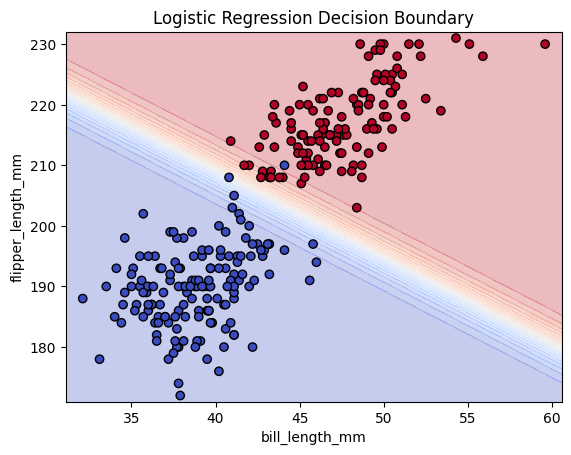

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# -----------------------------
# 1. Load dataset
# -----------------------------
df = df_noChinstraps.copy()

# Choose two attributes (try different pairs later)
X = df[["bill_length_mm", "flipper_length_mm"]]
y = df["species"]

# -----------------------------
# 2. Define pipeline
# -----------------------------
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),   # fill NaNs
    ("logreg", LogisticRegression())
])

# -----------------------------
# 3. Train/test splits
# -----------------------------
splits = {
    "50/50": 0.5,
    "80/20": 0.2
}

results = {}

for name, test_size in splits.items():
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )
    
    # Fit pipeline
    pipe.fit(X_train, y_train)
    
    # Predict
    y_pred = pipe.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label="Gentoo")
    
    results[name] = (acc, prec)
    print(f"{name} split -> Accuracy: {acc:.3f}, Precision: {prec:.3f}")

# -----------------------------
# 4. Plot decision boundary
# -----------------------------
def plot_decision_boundary(model, X, y, title, use_proba=True):
    # Fit model on full dataset for visualization
    model.fit(X, y)
    
    x_min, x_max = X.iloc[:,0].min()-1, X.iloc[:,0].max()+1
    y_min, y_max = X.iloc[:,1].min()-1, X.iloc[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    if use_proba:
        # Use probability of Gentoo for smooth shading
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        # Use hard labels, mapped to integers
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = pd.Series(Z).map({"Adelie": 0, "Gentoo": 1}).values
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm", levels=20 if use_proba else None)
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=(y=="Gentoo"), cmap="coolwarm", edgecolor="k")
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title(title)
    plt.show()

# Example: visualize with probability shading
plot_decision_boundary(pipe, X, y, "Logistic Regression Decision Boundary", use_proba=True)


# 06.04. - How Can a Tree Help! 

In [8]:
df_original  # see 06.01. pairplot

# Group by species and calculate mean and standard deviation
summary_stats = df_original.groupby('species')[['body_mass_g', 'flipper_length_mm']].agg(['mean', 'std']).round(1)

print(summary_stats)

          body_mass_g        flipper_length_mm     
                 mean    std              mean  std
species                                            
Adelie         3700.7  458.6             190.0  6.5
Chinstrap      3733.1  384.3             195.8  7.1
Gentoo         5076.0  504.1             217.2  6.5


In [9]:
df_original.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


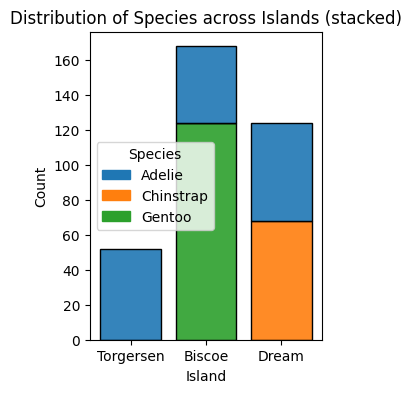

In [42]:
# Define a fixed palette so colors are consistent
palette = {
    "Adelie": "tab:blue",
    "Chinstrap": "tab:orange",
    "Gentoo": "tab:green"
}

plt.figure(figsize=(3,4))
ax = sns.histplot(
    data=df_original,
    x="island",
    hue="species",
    multiple="stack",
    shrink=0.8,
    alpha=0.9,
    palette=palette,
    legend=False   # turn off seaborn's auto-legend
)

# Manually build the legend with the palette
from matplotlib.patches import Patch
handles = [Patch(color=col, label=lab) for lab, col in palette.items()]
plt.legend(handles=handles, title="Species")

plt.xlabel("Island")
plt.ylabel("Count")
plt.title("Distribution of Species across Islands (stacked)")
plt.show()


In [87]:
import random

def get_species(observation):
    if observation['island'] == 'Torgersen':    # TORGERSEN - Adelie
        return 'Adelie'
    elif observation['island'] == 'Biscoe':     # BISCOE - Adelie vs Gentoo
        if observation['body_mass_g'] < 4000:
            return 'Adelie'
        elif observation['body_mass_g'] > 5000:
            return 'Gentoo'
        else:
            if observation['flipper_length_mm'] < 200:
                return 'Adelie'
            elif observation['flipper_length_mm'] > 214:
                return 'Gentoo'
            else:
                return 'Gentoo'
    else:                                       # DREAM - Adelie vs Chinstrap
        boolean = random.randint(0,1)
        if boolean:
            return 'Adelie'
        else:
            return 'Chinstrap'

def get_species_advanced(observation):
    if observation['island'] == 'Torgersen':    # TORGERSEN - Adelie
        return 'Adelie'
    elif observation['island'] == 'Biscoe':     # BISCOE - Adelie vs Gentoo
        if observation['body_mass_g'] < 4000:
            return 'Adelie'
        elif observation['body_mass_g'] > 5000:
            return 'Gentoo'
        else:
            if observation['flipper_length_mm'] < 200:
                return 'Adelie'
            elif observation['flipper_length_mm'] > 214:
                return 'Gentoo'
            else:
                return 'Gentoo'
    else:                                       # DREAM - Adelie vs Chinstrap
        if observation['bill_length_mm'] > 47:
            return 'Chinstrap'
        elif observation['bill_length_mm'] < 40:
            return 'Adelie'
        else:
            boolean = random.randint(0,1)
            if boolean:
                return 'Adelie'
            else:
                return 'Chinstrap'

df = df_original.dropna()
df['pred_species'] = df.apply(get_species, axis=1)
df['pred_species_advanced'] = df.apply(get_species_advanced, axis=1)
df.loc[40:60,:]

/var/folders/tc/s2nvq1sx1t386h255fx3qslc0000gn/T/ipykernel_21849/3202266650.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred_species'] = df.apply(get_species, axis=1)
/var/folders/tc/s2nvq1sx1t386h255fx3qslc0000gn/T/ipykernel_21849/3202266650.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred_species_advanced'] = df.apply(get_species_advanced, axis=1)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,pred_species,pred_species_advanced
40,Adelie,Dream,36.5,18.0,182.0,3150.0,Female,Chinstrap,Adelie
41,Adelie,Dream,40.8,18.4,195.0,3900.0,Male,Chinstrap,Chinstrap
42,Adelie,Dream,36.0,18.5,186.0,3100.0,Female,Adelie,Adelie
43,Adelie,Dream,44.1,19.7,196.0,4400.0,Male,Adelie,Chinstrap
44,Adelie,Dream,37.0,16.9,185.0,3000.0,Female,Chinstrap,Adelie
45,Adelie,Dream,39.6,18.8,190.0,4600.0,Male,Adelie,Adelie
46,Adelie,Dream,41.1,19.0,182.0,3425.0,Male,Adelie,Adelie
48,Adelie,Dream,36.0,17.9,190.0,3450.0,Female,Chinstrap,Adelie
49,Adelie,Dream,42.3,21.2,191.0,4150.0,Male,Chinstrap,Chinstrap
50,Adelie,Biscoe,39.6,17.7,186.0,3500.0,Female,Adelie,Adelie


In [92]:
print(((df['species'] == df['pred_species']).mean() * 100).round(2), '% accuracy')
print(((df['species'] == df['pred_species_advanced']).mean() * 100).round(2), '% accuracy (also using bill_length_mm)')

80.78 % accuracy
92.49 % accuracy (also using bill_length_mm)
